## Quick Guide


The notebook works as a simple script that calls data from CDMNext using CEIC's Python package, extracts all series from the selected insight, gets all timepoints for these series, builds dataframe, and create a grid of interactive plots with the given dataframes


> #### Installation Guide
>
> 1. Install Python 3.9+
> 2. Open terminal and execute
>  - pip install --extra-index-url https://downloads.ceicdata.com/python ceic_api_client
>  - pip install --extra-index-url https://downloads.ceicdata.com/python ceic_api_client --upgrade
---

> #### Usage Guide
>
> **Import libraries** - cell to define libraries we need to set before running the code<br />
> **Insight Information** - cell to define the insight we want to replicate<br />
> **Function Definitions** - to read or change the existing logic used by the main program<br />
> **DataFrames** - select the dataframes that are going to be plotted<br />
> **Code Execution** - run the main program based on parameters and functions<br />
> 
>
> Visit **[CEIC Main Page](https://www.ceicdata.com/en)** for more information on how to use our data and the PyCEIC package.
>

In [1]:
# Call the PyCEIC functionalities 
from ceic_api_client.pyceic import Ceic 

# Import malplotlib
import matplotlib
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import matplotlib.image as image
import matplotlib.image as mpimg
from matplotlib.dates import DateFormatter
from matplotlib import animation
from matplotlib.animation import FuncAnimation

import openpyxl
import numpy as np
import pandas as pd

from itertools import count
%matplotlib notebook

from datetime import datetime
import time

In [2]:
workbook = openpyxl.load_workbook(r'C:\Users\necheverry\OneDrive - Internet Securities, LLC\Documents\Documentos\CEIC\Scripts\Python\credentials.xlsx')
sheet = workbook.active
user = sheet['A2'].value
pasw = sheet['B2'].value
Ceic.login(user,pasw)

C:\Users\necheverry\Anaconda3\lib\site-packages\ceic_api_client\facade\pyceic_warnings.py:83: UserWarning: 
interaction interface to CEIC macroeconomic data and
any data usage abuse attempt will be recorded.
  warnings.warn(message=self._WARNING_MESSAGE, category=UserWarning)


### 1. Extract data from CDMNext

If you are not a client, proceed to step 3

In [52]:
def get_series_to_df(id_list, date):
    
    '''This function takes the id of a series and downloads the data points'''
    
    series_d, series_w, series_m = {},{},{} # Dictionaries for each type of frequencies
    
    # Download the insight series
    result = Ceic.series(id_list, start_date=date)
    
    # Extract the time points
    for s in result.data:
        if s.series_data != None:
            if s.insight_series.applied_functions != None:
                column = s.series_data.metadata.name + ': ' + s.insight_series.applied_functions
            else:
                column = s.series_data.metadata.name
            time_points_dict = dict((tp._date, tp.value) for tp in s.series_data.time_points)
            series = pd.Series(time_points_dict)

            if s.series_data.metadata.frequency.id == 'D':
                series_d[column] = series
            elif s.series_data.metadata.frequency.id == 'W':
                series_w[column] = series
            elif s.series_data.metadata.frequency.id == 'M':
                series_m[column] = series

    df_daily = pd.DataFrame(series_d)
    df_weekly = pd.DataFrame(series_w)
    df_month = pd.DataFrame(series_m)
    
    # Converting the index as date
    df_daily.index = pd.to_datetime(df_daily.index)
    df_weekly.index = pd.to_datetime(df_weekly.index)
    df_month.index = pd.to_datetime(df_month.index)
    
    # Converting the index as date
    df_daily = df_daily.sort_index(ascending=True)
    df_weekly = df_weekly.sort_index(ascending=True)
    df_month = df_weekly.sort_index(ascending=True)
    
    return df_daily, df_weekly, df_month

In [53]:
# Series ID's

grips_series = ["221c5dd5-43d3-49e9-8a3c-fe5db457b62f", "42d78582-f1cb-4601-9fc8-229a627bc97e", 
               "760206ca-1aaa-4568-9d6b-7e24a148af13", "2298c105-8a19-4659-9984-b909bc34e5d9", 
               "818c6c50-9b16-4e82-b14c-f3e1f5fbbf94", "3d250df3-42d9-45e8-99ba-f24a924b6a45", 
               "2860b57a-b7b7-450a-9803-5e198fd28b6c", "f82a74a2-bdc6-4199-a5f5-31c92ff529d9", 
               "0542a1fa-7a91-4226-acb3-8ac6f6da4daf", "d7ae9fbd-d112-446f-be94-8a17ecd00bdc", 
               "f89c6220-4183-45db-aa59-00aa4f6b8c64", "fa5e29b6-6060-4bf0-b8ce-f8f779200f32", 
               "2f578d60-48f4-4911-bd01-a8b7628d144c", "aa5ac93e-6a0c-4685-a2b1-8c091d179a53", 
               "7d908397-6f71-489a-8dcb-64d03473c3c8", "9c5e5470-ef91-4281-accc-8873ae6faca9", 
               "f4c7279f-ba70-40ef-87e0-00c2154cb634", "abbd4ced-ddf8-4d8e-bc64-c5f44769b0db", 
               "47a0aba7-7c27-4e2b-a97b-21bcb96cb85f", "eef094bc-57da-4ba5-b84c-e4444269e2a2", 
               "7a3df027-f699-46d2-8cdc-46ccc326b7b4", "d6e70674-0399-42e7-839c-33ee7b72347d", 
               "af2d6971-287d-40f8-a854-717ec52baa19", "8d4f22f9-1754-4066-8d4b-50ddbb408aba", 
               "37661cac-1b64-4b89-a7c8-220694ccce69"]

grips_series_date = '2021-01-01'

### 2. Explore the Data

In [54]:
grips_result_d, grips_result_w, grips_result_m = get_series_to_df(grips_series,grips_series_date)
grips_result_d

,E-Commerce Transactions: Volume: MOVAV(Simple; 14) > DATE_RANGE(2021-01-01; none),E-Commerce Transactions: Value: Travel & Tourism: Accommodation & Hotels: SUM(Yes; Yes)+selected(517724167+517654577+517848247+517689717) > ROLLSUM(30) > UNIT_MULTIPLIER(Million; Convert all multipliers),E-Commerce Transactions: Value: Computers Electronics & Technology: Computer Hardware: SUM(Yes; Yes)+selected(517865057+517669177+517692147+517823537+517764667+517918887+517740367+517686167) > ROLLSUM(30) > UNIT_MULTIPLIER(Million; Convert all multipliers),E-Commerce Transactions: Value: Pets & Animals: Animals: SUM(Yes; Yes)+selected(517883977+517824067+517953057+517894347) > ROLLSUM(30) > UNIT_MULTIPLIER(Million; Convert all multipliers),E-Commerce Transactions: Value: Arts & Entertainment: Arts & Entertainment: SUM(Yes; Yes)+selected(517729107+517852847+517881707+517940157+517672187) > ROLLSUM(30) > UNIT_MULTIPLIER(Million; Convert all multipliers),E-Commerce Transactions: Value: Science & Education: Education: SUM(Yes; Yes)+selected(517654677+517726527+517778787) > ROLLSUM(30) > UNIT_MULTIPLIER(Million; Convert all multipliers),E-Commerce Transactions: Value: Sports: Golf: SUM(Yes; Yes)+selected(517758907+517951757+517716597+517689687+517742147+517668507+517923197) > ROLLSUM(30) > UNIT_MULTIPLIER(Million; Convert all multipliers),E-Commerce Transactions: Value: MOVAV(Simple; 14) > UNIT_MULTIPLIER(Million; Convert all multipliers) > DATE_RANGE(2021-01-01; none),E-Commerce Transactions: Value: Home & Garden: Furniture: SUM(Yes; Yes)+selected(517679167+517937427+517730607+517942807) > ROLLSUM(30) > UNIT_MULTIPLIER(Million; Convert all multipliers),E-Commerce Transactions: Value: Hobbies & Leisure: Antiques & Collectibles: SUM(Yes; Yes)+selected(517939717+517949727+517888007+517790487+517729627) > ROLLSUM(30) > UNIT_MULTIPLIER(Million; Convert all multipliers),E-Commerce Transactions: Value: Finance: Accounting & Auditing: SUM(Yes; Yes)+selected(517858397+517853537+517895247+517646077) > ROLLSUM(30) > UNIT_MULTIPLIER(Million; Convert all multipliers),E-Commerce Transactions: Value: E-Commerce & Shopping: Auctions: SUM(Yes; Yes)+selected(517883067+517929977+517748827+517721617+517892137+517823367+517794997+517675337) > ROLLSUM(30) > UNIT_MULTIPLIER(Million; Convert all multipliers),E-Commerce Transactions: Value: Health: Health: SUM(Yes; Yes)+selected(517936527+517674967+517816077+517884657+517820837) > ROLLSUM(30) > UNIT_MULTIPLIER(Million; Convert all multipliers),E-Commerce Transactions: Value: Business & Consumer Services: Business & Consumer Services: SUM(Yes; Yes)+selected(517894377+517940757+517830067+517652687+517789187+517728437+517722737) > ROLLSUM(30) > UNIT_MULTIPLIER(Million; Convert all multipliers),E-Commerce Transactions: Value: Heavy Industry & Engineering: Chemical Industry: SUM(Yes; Yes)+selected(517719137+517742107+517894387) > ROLLSUM(30) > UNIT_MULTIPLIER(Million; Convert all multipliers),E-Commerce Transactions: Average Order Value (AOV): MOVAV(Simple; 14) > DATE_RANGE(2021-01-01; none),E-Commerce Transactions: Value: Law & Government: Government: SUM(Yes; Yes)+selected(517660017+517843877) > ROLLSUM(30) > UNIT_MULTIPLIER(Million; Convert all multipliers)
2021-01-01,640097.928571,168.968597,315.655426,19.156144,277.171107,20.900710,38.665667,80.960423,116.835334,7.208241,5.374980,96.105755,43.596610,346.948430,0.930239,126.168118,0.009245
2021-01-02,633152.571429,165.617342,304.841089,19.282032,273.457329,20.525404,38.149890,79.067039,116.577731,7.032162,5.360475,94.455511,44.307710,328.163545,0.889900,124.640637,0.008852
2021-01-03,636836.928571,165.036684,293.754867,19.363814,269.433733,20.794083,37.455375,78.622972,117.084026,6.873264,5.318463,92.925253,45.659148,313.093623,0.863058,123.433264,0.008575
2021-01-04,650666.428571,167.695714,278.609058,19.639252,269.966258,22.208103,36.834200,79.533047,117.060469,6.701637,5.566852,91.664159,46.648647,329.222227,0.931025,122.402474,0.009717
2021-01-05,659714.142857,169.293765

In [55]:
ecom_value_2021 = grips_result_d.loc['2021-01-01':'2021-12-31','E-Commerce Transactions: Value: MOVAV(Simple; 14) > UNIT_MULTIPLIER(Million; Convert all multipliers) > DATE_RANGE(2021-01-01; none)']
ecom_value_2022 = grips_result_d.loc['2022-01-01':'2022-12-31','E-Commerce Transactions: Value: MOVAV(Simple; 14) > UNIT_MULTIPLIER(Million; Convert all multipliers) > DATE_RANGE(2021-01-01; none)']
ecom_value_2023 = grips_result_d.loc['2023-01-01':,'E-Commerce Transactions: Value: MOVAV(Simple; 14) > UNIT_MULTIPLIER(Million; Convert all multipliers) > DATE_RANGE(2021-01-01; none)']


In [56]:
ecom_value_2022

2022-01-01    103.248756
2022-01-02    102.915679
2022-01-03    102.649507
2022-01-04    102.243958
2022-01-05    102.919266
                 ...    
2022-12-27    111.437456
2022-12-28    106.998041
2022-12-29    103.579822
2022-12-30    100.168473
2022-12-31     97.509568
Name: E-Commerce Transactions: Value: MOVAV(Simple; 14) > UNIT_MULTIPLIER(Million; Convert all multipliers) > DATE_RANGE(2021-01-01; none), Length: 365, dtype: float64

### Animation


<IPython.core.display.Javascript object>


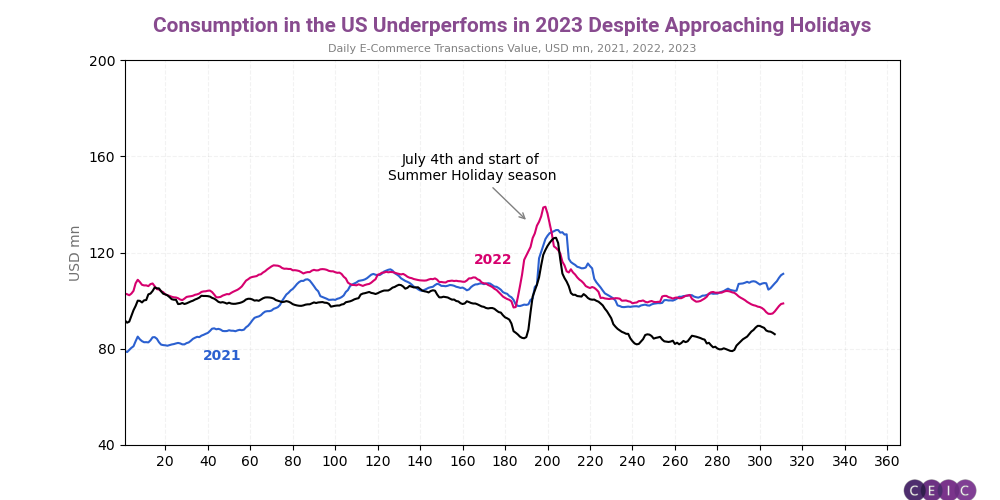

El tiempo de ejecución fue: 206.2366442680359 segundos


In [124]:
start_time = time.time()

fig, ax = plt.subplots(figsize=(10,5))

# Add title
title = ax.set_title('Consumption in the US Underperfoms in 2023 Despite Approaching Holidays', pad=20, 
                     fontsize=15, font='roboto', weight='bold', color='#884b8f')

# Add subtitle
subtitle = ax.annotate('Daily E-Commerce Transactions Value, USD mn, 2021, 2022, 2023',xy=(0.5,1.02), xytext=(0,0), 
                       xycoords='axes fraction', textcoords='offset points', ha='center', fontsize=8, 
                       color='grey')

# Label each axis 
ax.set_ylabel('USD mn', color='#707070')

# Add CEIC logo
# Import logo in .png
im = r'C:\Users\necheverry\OneDrive - Internet Securities, LLC\Documents\Documentos\CEIC\Scripts\Python\ceic_logo_png-sinfondo.png'
img = mpimg.imread(im)

# Define the coordinates where the logo will be displayed
# The coordinates mean: left, bottom, width and height
ax_img = fig.add_axes([0.9, -0.035, 0.08, 0.08], anchor='NE', xticks=[], yticks=[], frame_on=False)
ax_img.imshow(img)

# Ticks
ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=20))

#Set the limits and the ticks for X axis and the date format
# ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=8))
# ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

# Add gridlines
ax.grid(color='grey', alpha=0.1, linestyle='--')

# # Set the limits for the Y axis
# min_date = datetime.strptime('2021-06-01', '%Y-%m-%d')
# max_date = datetime.strptime('2023-08-15', '%Y-%m-%d')

# Set the limits for the Y axis
ax.set_ylim([40, 200])
ax.set_xlim([1,366])

# Creat an index from 1 to 365
ind = list(range(0,365))
ind2023 = len(ecom_value_2023)

extra_frames = 90

# Extiende la lista 'ind' con el último valor repetido
ind_extended = ind + [ind[-1]] * extra_frames

# Initialize the lines
line, = ax.plot([], [], color= '#2b60d0', linestyle='-', label='2021')
line2, = ax.plot([], [], color= '#d6006e', linestyle='-', label='2022')
line3, = ax.plot([], [], color= '#000000', linestyle='-', label='2023')

#Legend
# ax.legend(loc='lower right', ncol=2, edgecolor='none')

annotations_info = [
    {
        'date': 200,
        'props': {
            'text': 'July 4th and start of \nSummer Holiday season',
            'xy': (0.52, 0.58),
            'xytext': (-40, 30),
            'xycoords': 'axes fraction',
            'textcoords': 'offset points',
            'fontsize': 10,
            'ha': 'center',
            'va': 'baseline',
            'color': 'black',
            'weight': 'normal',
            'arrowprops': {
                'arrowstyle': '->',
                'color': 'grey'
            }
        },
        'visible': False,  # This flag will indicate whether the annotation should be visible
    },
    {
        'date': 345,
        'props': {
            'text': 'Thanksgiving and Black Friday \nRelated Spending Surge',
            'xy': (0.9, 0.8),
            'xytext': (-100, 40),
            'xycoords': 'axes fraction',
            'textcoords': 'offset points',
            'fontsize': 10,
            'ha': 'center',
            'va': 'top',
            'color': 'black',
            'weight': 'normal',
            'arrowprops': {
                'arrowstyle': '->',
                'color': 'grey'
            }
        },
        'visible': False,  # This flag will indicate whether the annotation should be visible
    },
    {
        'date': 50,
        'props': {
            'text': '2021',
            'xy': (0.1, 0.25),
            'xytext': (0, 0),
            'xycoords': 'axes fraction',
            'textcoords': 'offset points',
            'fontsize': 10,
            'ha': 'left',
            'va': 'top',
            'color': '#2b60d0',
            'weight': 'bold'
        },
        'visible': False,  # This flag will indicate whether the annotation should be visible
    },
    {
        'date': 180,
        'props': {
            'text': '2022',
            'xy': (0.45, 0.5),
            'xytext': (0, 0),
            'xycoords': 'axes fraction',
            'textcoords': 'offset points',
            'fontsize': 10,
            'ha': 'left',
            'va': 'top',
            'color': '#d6006e',
            'weight': 'bold'
        },
        'visible': False,  # This flag will indicate whether the annotation should be visible
    },
        {
        'date': 320,
        'props': {
            'text': '2023',
            'xy': (0.85, 0.25),
            'xytext': (0, 0),
            'xycoords': 'axes fraction',
            'textcoords': 'offset points',
            'fontsize': 10,
            'ha': 'left',
            'va': 'top',
            'color': 'black',
            'weight': 'bold'
        },
        'visible': False,  # This flag will indicate whether the annotation should be visible
    }
]

# Create the annotations and store them in a list
annotations = [ax.annotate(**info['props'], visible=info['visible']) for info in annotations_info]

def init():  # Initialization function
    line.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    
    for annotation in annotations:
        annotation.set_visible(False)
        
    return line, line2, line3

def animate(i):
    index = min(i, len(ecom_value_2021) - 1)  # Asegúrate de no exceder el índice máximo
    line.set_data(ind[:index], ecom_value_2021.iloc[:index])
    line2.set_data(ind[:index], ecom_value_2022.iloc[:index])
    
    if i < len(ecom_value_2023):
        line3.set_data(ind[:i], ecom_value_2023.iloc[:i])
    else:
        line3.set_data(ind[:len(ecom_value_2023)], ecom_value_2023.iloc[:])

    # Actualiza las anotaciones
    current_point = ind[i]
    for annotation, info in zip(annotations, annotations_info):
        if current_point >= info['date'] and not annotation.get_visible():
            annotation.set_visible(True)
            
    return line, line2, line3


#Animation
ani = FuncAnimation(fig=fig, func=animate, frames=(ind_extended), init_func=init, blit=False, interval=1)

plt.show()
# # Save as mp4
f = r"grips-chart-animation.mp4"
writervideo = animation.FFMpegWriter(fps=30) 
ani.save(f, writer=writervideo, dpi=300)

#Save as gif
f = r"grips-chart-animation.gif" 
writergif = animation.PillowWriter(fps=300) 
ani.save(f, writer=writergif, dpi=300)

end_time = time.time()

print(f"El tiempo de ejecución fue: {end_time - start_time} segundos")